<a href="https://colab.research.google.com/github/priyanshu0627/BOOK_GENRE_CLASSIFICATION/blob/main/BGC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!DOCTYPE html>
<html>
<head>
<meta http-equiv="Content-type" content="text/html; charset=utf-8">
<meta http-equiv="Content-Security-Policy" content="default-src 'none'; style-src 'unsafe-inline'; img-src data:; connect-src 'self'">
<title>Page not found &middot; GitHub Pages</title>
<style type="text/css" media="screen">
      body {
        background-color: #f1f1f1;
        margin: 0;
        font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
      }

      .container { margin: 50px auto 40px auto; width: 600px; text-align: center; }

      a { color: #4183c4; text-decoration: none; }
      a:hover { text-decoration: underline; }

      h1 { width: 800px; position:relative; left: -100px; letter-spacing: -1px; line-height: 60px; font-size: 60px; font-weight: 100; margin: 0px 0 50px 0; text-shadow: 0 1px 0 #fff; }
      p { color: rgba(0, 0, 0, 0.5); margin: 20px 0; line-height: 1.6; }

      ul { list-style: none; margin: 25px 0; padding: 0; }
      li { display: table-cell
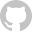
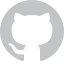

In [ ]:
!curl -s https://course.fast.ai/setup/colab 

In [ ]:
!nvidia-smi

Mon Nov 16 08:26:16 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from fastai.vision import *

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
from  google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
t_path='/content/gdrive/My Drive/Colab Notebooks/Books'
p_path=Path(t_path)

In [ ]:

for folder in ('Children-Books', 'Religion', 'Romance', 'Science-Fiction-Fantasy-Horror','Sport'):
    print(folder)
    verify_images(p_path/folder, delete=True, max_size=600)

Children-Books


Religion


Romance


Science-Fiction-Fantasy-Horror


Sport


In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, 
                                  num_workers=4).normalize(imagenet_stats)
data                                  

ImageDataBunch;

Train: LabelList (3944 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Romance,Romance,Romance,Romance,Romance
Path: /content/gdrive/My Drive/Colab Notebooks/Books;

Valid: LabelList (985 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Children-Books,Religion,Romance,Children-Books,Religion
Path: /content/gdrive/My Drive/Colab Notebooks/Books;

Test: None

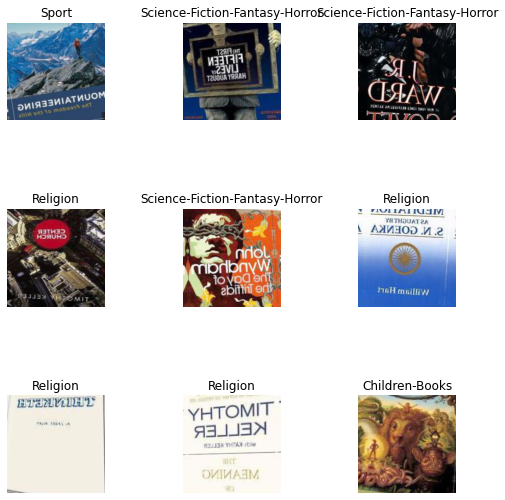

In [ ]:
data.classes
data.show_batch(rows=3, figsize=(7, 8))


In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['Children-Books',
  'Religion',
  'Romance',
  'Science-Fiction-Fantasy-Horror',
  'Sport'],
 5,
 3944,
 985)

In [ ]:
from fastai.metrics import accuracy
learn = create_cnn(data, models.resnet34, metrics=accuracy)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (3944 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Romance,Romance,Romance,Romance,Romance
Path: /content/gdrive/My Drive/Colab Notebooks/Books;

Valid: LabelList (985 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Children-Books,Religion,Romance,Children-Books,Religion
Path: /content/gdrive/My Drive/Colab Notebooks/Books;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), 

In [ ]:
defaults.device = torch.device('cuda')
torch.cuda.is_available()

True

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


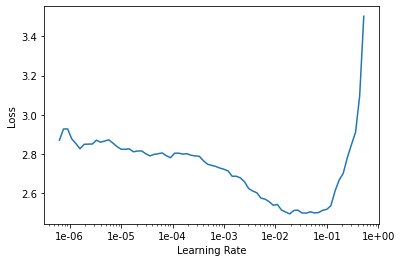

In [ ]:
learn.recorder.plot()

In [ ]:
lr = 0.001
learn.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,2.440374,1.619581,0.405076,00:45
1,2.052293,1.453466,0.489340,00:45
2,1.816049,1.364173,0.513706,00:45
3,1.598995,1.330039,0.497462,00:45
4,1.426309,1.261727,0.528934,00:45
5,1.325651,1.251890,0.521827,00:45
6,1.243877,1.225480,0.527919,00:45
7,1.154592,1.206397,0.539086,00:44
8,1.137257,1.205195,0.540102,00:45
9,1.116170,1.199791,0.545178,00:45


In [ ]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


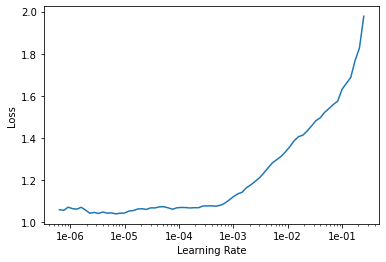

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10, slice(0.0001, lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,1.047246,1.178032,0.551269,00:46
1,1.027192,1.174940,0.558376,00:47
2,0.955738,1.200014,0.575635,00:47
3,0.887201,1.190772,0.581726,00:47
4,0.740886,1.203745,0.587817,00:47
5,0.616068,1.223741,0.606091,00:47
6,0.477543,1.261103,0.580711,00:47
7,0.382383,1.264943,0.600000,00:47
8,0.316691,1.265149,0.608122,00:47
9,0.279891,1.263949,0.615228,00:47


In [ ]:
learn.save('res34-stage1')


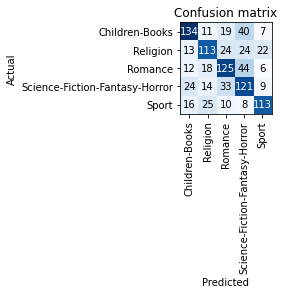

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.most_confused()

[('Romance', 'Science-Fiction-Fantasy-Horror', 44),
 ('Children-Books', 'Science-Fiction-Fantasy-Horror', 40),
 ('Science-Fiction-Fantasy-Horror', 'Romance', 33),
 ('Sport', 'Religion', 25),
 ('Religion', 'Romance', 24),
 ('Religion', 'Science-Fiction-Fantasy-Horror', 24),
 ('Science-Fiction-Fantasy-Horror', 'Children-Books', 24),
 ('Religion', 'Sport', 22),
 ('Children-Books', 'Romance', 19),
 ('Romance', 'Religion', 18),
 ('Sport', 'Children-Books', 16),
 ('Science-Fiction-Fantasy-Horror', 'Religion', 14),
 ('Religion', 'Children-Books', 13),
 ('Romance', 'Children-Books', 12),
 ('Children-Books', 'Religion', 11),
 ('Sport', 'Romance', 10),
 ('Science-Fiction-Fantasy-Horror', 'Sport', 9),
 ('Sport', 'Science-Fiction-Fantasy-Horror', 8),
 ('Children-Books', 'Sport', 7),
 ('Romance', 'Sport', 6)]

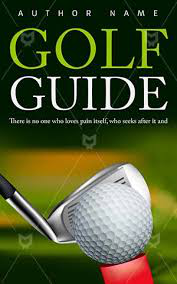

In [ ]:
img = open_image('/content/gdrive/My Drive/Colab Notebooks/PREDICTION/first_test.jpg')
img

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'Sport'

In [ ]:
learn.predict(img)

(Category tensor(4),
 tensor(4),
 tensor([0.0100, 0.0672, 0.1099, 0.0587, 0.7542]))

In [ ]:
pred_class.obj

'Sport'

In [ ]:
from fastai.widgets import *

In [ ]:
ds, idxs = DatasetFormatter().from_toplosses(learn)

In [ ]:
ImageCleaner(ds, idxs, p_path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [ ]:
ds, idxs = DatasetFormatter().from_similars(learn)

Getting activations...


Computing similarities...


In [ ]:
ImageCleaner(ds, idxs, p_path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [ ]:

df = pd.read_csv(p_path/'cleaned.csv', header='infer')
df.head()

,name,label
0,Romance/0000014.jpg,Romance
1,Romance/0000012.jpg,Romance
2,Romance/0000011.jpg,Romance
3,Romance/0000019.jpg,Romance
4,Romance/0000010.jpg,Romance


In [ ]:
df[(df['name'].apply(lambda x: len(x)<5))]

,name,label


In [ ]:
np.random.seed(42)
db = (ImageList.from_df(df, p_path)
                   .random_split_by_pct(0.2)
                   .label_from_df()
                   .transform(get_transforms(), size=224)
                   .databunch(bs=8)).normalize(imagenet_stats)

In [ ]:

data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Children-Books',
  'Religion',
  'Romance',
  'Science-Fiction-Fantasy-Horror',
  'Sport'],
 5,
 3944,
 985)

In [ ]:
db.classes, db.c, len(db.train_ds), len(db.valid_ds)

(['Children-Books',
  'Religion',
  'Romance',
  'Science-Fiction-Fantasy-Horror',
  'Sport'],
 5,
 3156,
 788)

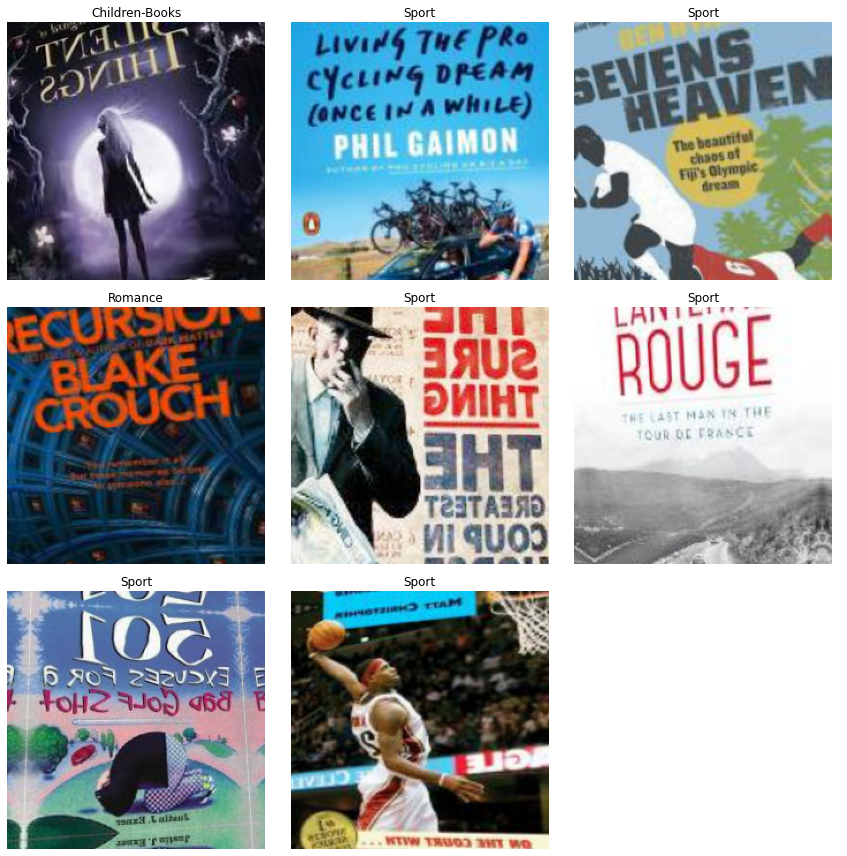

In [ ]:
db.show_batch()


In [ ]:
learn.data = db

In [ ]:
learn.freeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


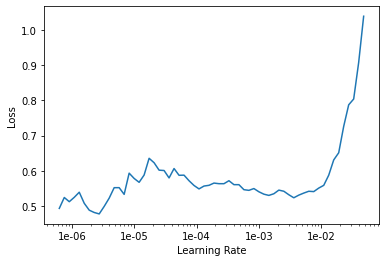

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
lr=0.001

In [ ]:
learn.fit_one_cycle(8, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.654757,0.137492,0.963198,00:45
1,0.640838,0.186784,0.947970,00:44
2,0.651443,0.212773,0.927665,00:43
3,0.632659,0.199712,0.928934,00:41
4,0.597908,0.185270,0.936548,00:41
5,0.581109,0.192364,0.939086,00:40
6,0.524415,0.188385,0.942893,00:40
7,0.514047,0.187350,0.942893,00:39


In [ ]:
learn.save('res34-stage2')

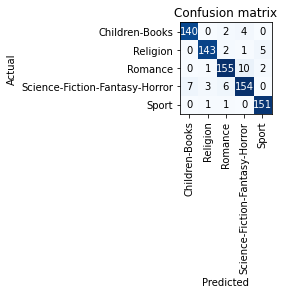

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.most_confused()

[('Romance', 'Science-Fiction-Fantasy-Horror', 10),
 ('Science-Fiction-Fantasy-Horror', 'Children-Books', 7),
 ('Science-Fiction-Fantasy-Horror', 'Romance', 6),
 ('Religion', 'Sport', 5),
 ('Children-Books', 'Science-Fiction-Fantasy-Horror', 4),
 ('Science-Fiction-Fantasy-Horror', 'Religion', 3),
 ('Children-Books', 'Romance', 2),
 ('Religion', 'Romance', 2),
 ('Romance', 'Sport', 2),
 ('Religion', 'Science-Fiction-Fantasy-Horror', 1),
 ('Romance', 'Religion', 1),
 ('Sport', 'Religion', 1),
 ('Sport', 'Romance', 1)]

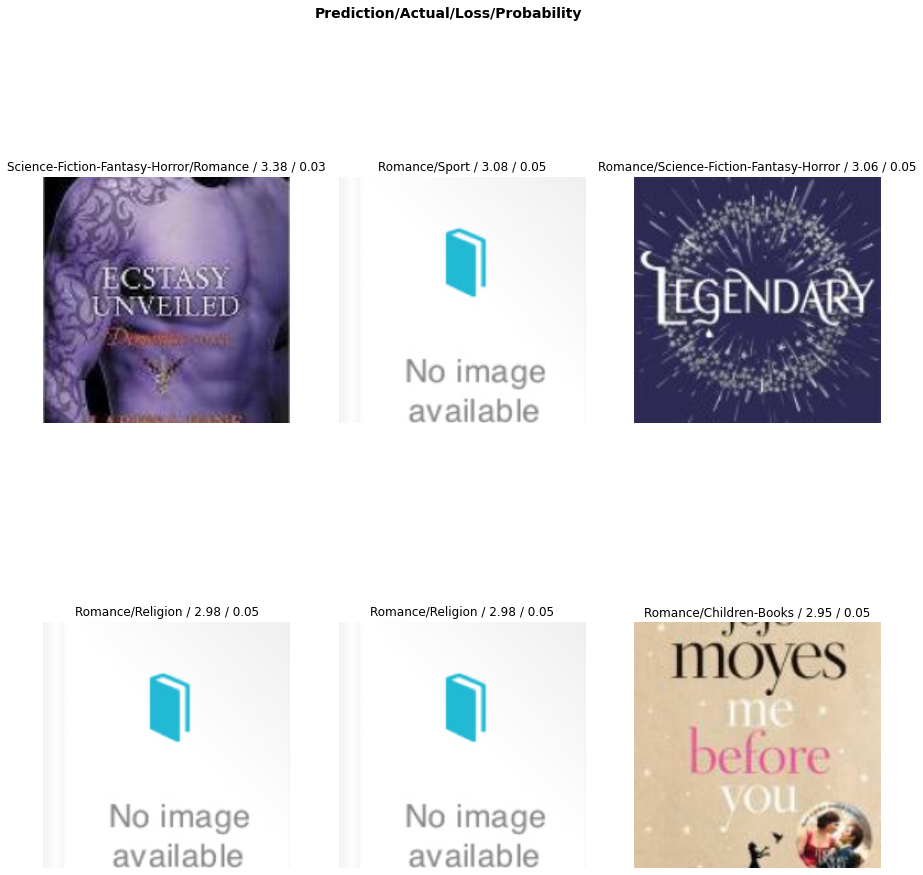

In [ ]:
interp.plot_top_losses(6, figsize=(15,15))

In [ ]:
learn.export()

In [ ]:
learn.load('res34-stage2')

Learner(data=ImageDataBunch;

Train: LabelList (3944 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Romance,Romance,Romance,Romance,Romance
Path: /content/gdrive/My Drive/Colab Notebooks/Books;

Valid: LabelList (985 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Children-Books,Religion,Romance,Children-Books,Religion
Path: /content/gdrive/My Drive/Colab Notebooks/Books;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), 

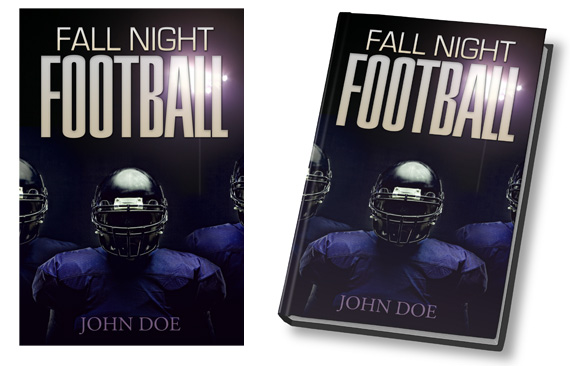

In [ ]:
img = open_image('/content/gdrive/MyDrive/Colab Notebooks/PREDICTION/2nd_test.jpg')
img

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'Sport'

In [ ]:
learn.predict(img)

(Category tensor(4),
 tensor(4),
 tensor([0.2835, 0.0307, 0.0008, 0.3166, 0.3684]))